<a href="https://colab.research.google.com/github/ozgekaragozz/NTT/blob/main/Yet_another_copy_of_data_preprocessing_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xgboost as xgb
import seaborn as sns

## Importing the dataset

In [302]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [303]:
numerical_cols = dataset.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_cols.corr()['SalePrice'].sort_values(ascending=False)
corr_matrix

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [304]:
correlation_matrix = numerical_cols.corr()

In [305]:
upper_triangle_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

high_corr = upper_triangle_matrix.stack().loc[lambda x: x > 0.8].sort_values(ascending=False)

print("0.8'den büyük olan korelasyona sahip sütunlar:")
print(high_corr)

0.8'den büyük olan korelasyona sahip sütunlar:
GarageCars   GarageArea      0.882475
YearBuilt    GarageYrBlt     0.825667
GrLivArea    TotRmsAbvGrd    0.825489
TotalBsmtSF  1stFlrSF        0.819530
dtype: float64


In [306]:
dataset['CarsPerArea'] = dataset['GarageArea']/dataset['GarageCars']

In [307]:
dataset['HasGarage'] = dataset['GarageYrBlt'].notna().astype(int)  # Garaj varsa 1, yoksa 0
dataset['GarageYrBlt'].fillna(0, inplace=True)

<ipython-input-307-c2ca757b8064>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['GarageYrBlt'].fillna(0, inplace=True)


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

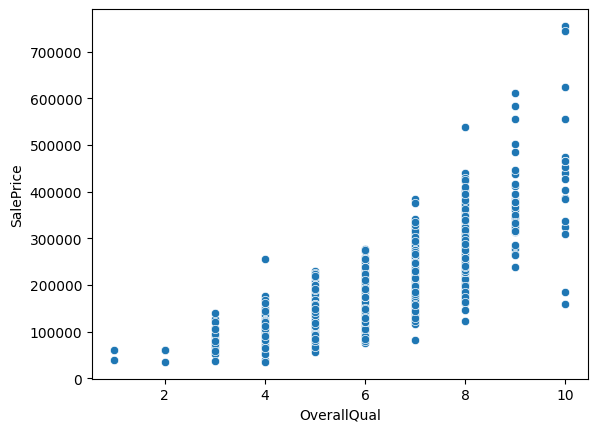

In [308]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=dataset)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

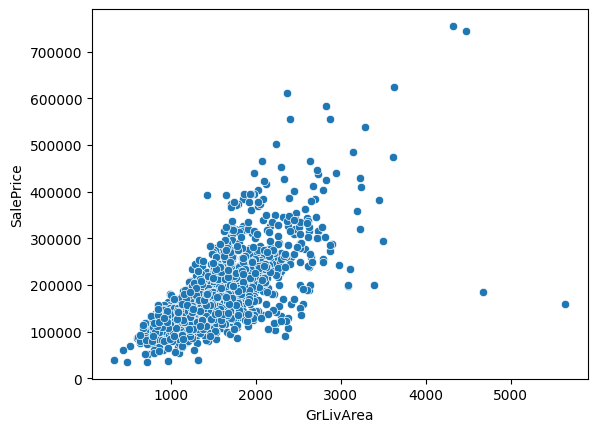

In [309]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=dataset)

In [310]:
dataset[(dataset['OverallQual'] > 8) & (dataset['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CarsPerArea,HasGarage
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,0,10,2007,New,Partial,184750,294.666667,1
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,NaN,0,1,2008,New,Partial,160000,709.000000,1


In [311]:
dataset[(dataset['GrLivArea'] > 4000) & (dataset['SalePrice'] < 400000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CarsPerArea,HasGarage
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,0,10,2007,New,Partial,184750,294.666667,1
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,NaN,0,1,2008,New,Partial,160000,709.000000,1


In [312]:
drop_index = dataset[(dataset['GrLivArea'] > 4000) & (dataset['SalePrice'] < 400000)].index

In [313]:
dataset = dataset.drop(drop_index, axis=0)

In [314]:
dataset = dataset.drop(['Id'], axis=1)
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CarsPerArea,HasGarage
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,274.000000,1
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,230.000000,1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,304.000000,1
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,214.000000,1
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,278.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,8,2007,WD,Normal,175000,230.000000,1
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,250.000000,1
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,252.000000,1
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,4,2010,WD,Normal,142125,240.000000,1


In [315]:
def percent_missing(dataset):
    percent_nan = 100*(dataset.isnull().sum()/len(dataset))
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [316]:
percent_nan = percent_missing(dataset)
percent_nan

,0
Electrical,0.068587
MasVnrArea,0.548697
BsmtQual,2.537723
BsmtCond,2.537723
BsmtFinType1,2.537723
BsmtExposure,2.606310
BsmtFinType2,2.606310
GarageCond,5.555556
GarageQual,5.555556
GarageFinish,5.555556


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'MasVnrArea'),
  Text(2, 0, 'BsmtQual'),
  Text(3, 0, 'BsmtCond'),
  Text(4, 0, 'BsmtFinType1'),
  Text(5, 0, 'BsmtExposure'),
  Text(6, 0, 'BsmtFinType2'),
  Text(7, 0, 'GarageCond'),
  Text(8, 0, 'GarageQual'),
  Text(9, 0, 'GarageFinish'),
  Text(10, 0, 'GarageType'),
  Text(11, 0, 'CarsPerArea'),
  Text(12, 0, 'LotFrontage'),
  Text(13, 0, 'FireplaceQu'),
  Text(14, 0, 'MasVnrType'),
  Text(15, 0, 'Fence'),
  Text(16, 0, 'Alley'),
  Text(17, 0, 'MiscFeature'),
  Text(18, 0, 'PoolQC')])

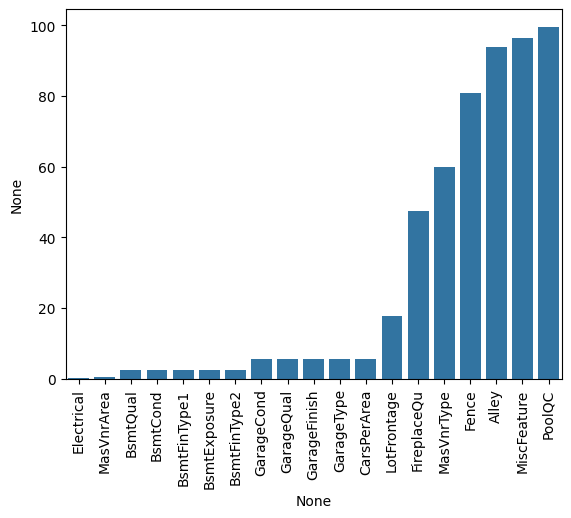

In [317]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

In [318]:
percent_nan[percent_nan < 1]

,0
Electrical,0.068587
MasVnrArea,0.548697


In [319]:
100/len(dataset)

0.06858710562414266

In [320]:
dataset[dataset['Electrical'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CarsPerArea,HasGarage
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,5,2008,WD,Normal,167500,200.0,1


In [321]:
dataset[dataset['MasVnrArea'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CarsPerArea,HasGarage
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,5,2010,WD,Normal,216500,220.000000,1
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,NaN,NaN,0,3,2007,WD,Alloca,200624,242.000000,1
650,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,5,2008,WD,Normal,205950,281.000000,1
936,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,8,2009,WD,Normal,184900,277.500000,1
973,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,0,12,2008,New,Partial,182000,240.000000,1
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,11,2007,New,Partial,199900,284.500000,1
1243,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2006,New,Partial,465000,283.333333,1
1278,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,3,2008,WD,Normal,237000,288.500000,1


In [322]:
dataset = dataset.dropna(axis=0, subset=['Electrical'])

In [323]:
#basment categorical columns

bsmt_ctr_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
dataset[bsmt_ctr_cols] = dataset[bsmt_ctr_cols].fillna('NA')

<ipython-input-323-178dc16b6620>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[bsmt_ctr_cols] = dataset[bsmt_ctr_cols].fillna('NA')


In [324]:
percent_nan = percent_missing(dataset)
percent_nan

,0
MasVnrArea,0.549073
GarageType,5.559369
GarageFinish,5.559369
GarageQual,5.559369
GarageCond,5.559369
CarsPerArea,5.559369
LotFrontage,17.776253
FireplaceQu,47.288950
MasVnrType,59.780371
Fence,80.713795


In [325]:
percent_nan = percent_missing(dataset)
percent_nan

,0
MasVnrArea,0.549073
GarageType,5.559369
GarageFinish,5.559369
GarageQual,5.559369
GarageCond,5.559369
CarsPerArea,5.559369
LotFrontage,17.776253
FireplaceQu,47.288950
MasVnrType,59.780371
Fence,80.713795


In [326]:
gar_ctr_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
dataset[gar_ctr_cols] = dataset[gar_ctr_cols].fillna('NA')

<ipython-input-326-43af47479def>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[gar_ctr_cols] = dataset[gar_ctr_cols].fillna('NA')


In [327]:
percent_nan = percent_missing(dataset)
percent_nan

,0
MasVnrArea,0.549073
CarsPerArea,5.559369
LotFrontage,17.776253
FireplaceQu,47.288950
MasVnrType,59.780371
Fence,80.713795
Alley,93.754290
MiscFeature,96.293754
PoolQC,99.588195


In [328]:
percent_nan = percent_missing(dataset)
percent_nan

,0
MasVnrArea,0.549073
CarsPerArea,5.559369
LotFrontage,17.776253
FireplaceQu,47.288950
MasVnrType,59.780371
Fence,80.713795
Alley,93.754290
MiscFeature,96.293754
PoolQC,99.588195


In [329]:
dataset['MasVnrArea'].fillna(0, inplace=True)

<ipython-input-329-bb38d40a9fd3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['MasVnrArea'].fillna(0, inplace=True)
<ipython-input-329-bb38d40a9fd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['MasVnrArea'].fillna(0, inplace=True)


In [330]:
dataset = dataset.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'Street', 'Condition2', 'LandSlope', 'Utilities', 'Functional', 'Heating', 'Electrical', 'SaleType', 'RoofMatl', 'PoolArea', 'MiscVal', 'BsmtHalfBath', 'LowQualFinSF', '3SsnPorch'], axis=1)

In [331]:
percent_nan = percent_missing(dataset)
percent_nan

,0
CarsPerArea,5.559369
LotFrontage,17.776253
FireplaceQu,47.288950


In [332]:
dataset['FireplaceQu'].value_counts()

,count
FireplaceQu,
Gd,378
TA,313
Fa,33
Ex,24
Po,20


In [333]:
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('NA')

<Axes: xlabel='LotFrontage', ylabel='Neighborhood'>

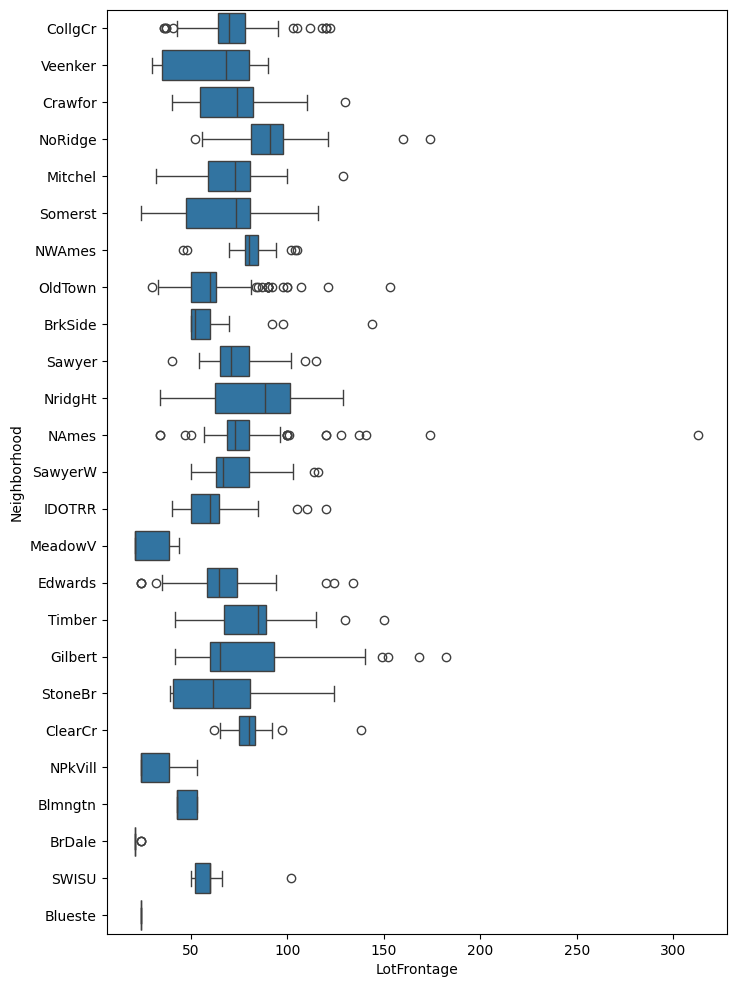

In [334]:
plt.figure(figsize=(8,12), dpi=100)
sns.boxplot(x='LotFrontage', y='Neighborhood', data=dataset, orient='h')

In [335]:
"""
LotFrontage: Linear feet of street connected to property
Neighborhood: Physical locations within Ames city limits
"""
dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [336]:
dataset['CarsPerArea'] = dataset['CarsPerArea'].fillna(0)

In [337]:
percent_nan = percent_missing(dataset)
percent_nan

,0


In [338]:
dataset.shape

(1457, 63)

In [339]:
from scipy import stats

outlier_col = ['LotArea', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'SalePrice']

z_scores = np.abs(stats.zscore(dataset[outlier_col]))

outliers = np.where(z_scores > 3)

outlier_indices = set(outliers[0])

cleaned_dataset = dataset.drop(index=list(outlier_indices))

dataset = cleaned_dataset

print("New dataset:")
print(dataset)

New dataset:
      MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL         62.0     7917      Reg         Lvl   
1456          20       RL         85.0    13175      Reg         Lvl   
1457          70       RL         66.0     9042      Reg         Lvl   
1458          20       RL         68.0     9717      Reg         Lvl   
1459          20       RL         75.0     9937      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType  ... WoodDeckSF  OpenPorchSF  \
0       Inside      CollgCr       Norm    

In [340]:
dataset.shape

(1374, 63)

In [341]:
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'YrSold',
 'SalePrice',
 'CarsPerArea',
 'HasGarage']

In [342]:
cat_cols = dataset.select_dtypes(include=['object']).columns.tolist()
cat_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleCondition']

In [343]:
dataset.shape

(1374, 63)

## Encoding categorical data

In [344]:
!pip install category_encoders
!pip install scikit-learn --upgrade
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

label_cols = ['CentralAir', 'PavedDrive']
label_encoder = LabelEncoder()

for col in label_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

target_cols = ['MSZoning','Neighborhood', 'BldgType', 'Exterior1st', 'Exterior2nd', 'Foundation', 'SaleCondition']
target_encoder = TargetEncoder()

for  col in target_cols:
    dataset[col] = target_encoder.fit_transform(dataset[col], dataset['SalePrice'])

ordinal_cols = ['LotShape', 'LandContour', 'ExterQual', 'ExterCond',
                    'BsmtQual', 'BsmtCond', 'KitchenQual', 'GarageCond', 'GarageQual',
                    'HeatingQC', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'FireplaceQu', 'GarageFinish', 'HouseStyle']

ordinal_encoder = OrdinalEncoder()
dataset[ordinal_cols] = ordinal_encoder.fit_transform(dataset[ordinal_cols])

one_hot_cols = ['LotConfig', 'Condition1', 'RoofStyle', 'GarageType']

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

onehot_encoded = onehot_encoder.fit_transform(dataset[one_hot_cols])
onehot_encoded_df = pd.DataFrame(onehot_encoded,
                                 columns=onehot_encoder.get_feature_names_out(one_hot_cols),
                                 index=dataset.index)

dataset = pd.concat([dataset, onehot_encoded_df], axis=1)

dataset.drop(columns=one_hot_cols, inplace=True)

print("Dataset shape after One-Hot Encoding:", dataset.shape)

Dataset shape after One-Hot Encoding: (1374, 82)


In [345]:
x = dataset.drop(columns=['SalePrice'])
y = dataset['SalePrice'].values

## Splitting the dataset into the Training set and Test set

In [346]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Feature Scaling

In [347]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

numeric_cols.remove('SalePrice')

x_train[numeric_cols] = sc.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = sc.transform(x_test[numeric_cols])

In [348]:
print(x_train)

      MSSubClass       MSZoning  LotFrontage   LotArea  LotShape  LandContour  \
1306    1.476083  187761.962929    -1.051568 -0.514236       0.0          3.0   
1155   -0.876658  187761.962929     0.963800  0.135549       0.0          3.0   
156    -0.876658  187761.962929    -0.475749 -0.472485       3.0          3.0   
1255   -0.170836  122656.725396    -0.859628 -0.636082       3.0          3.0   
512    -0.876658  187761.962929     0.004101 -0.148700       3.0          3.0   
...          ...            ...          ...       ...       ...          ...   
765    -0.876658  187761.962929     0.244025  0.786356       0.0          3.0   
965     0.064438  187761.962929    -0.235824  0.045059       3.0          3.0   
1166   -0.876658  187761.962929    -0.283809  0.085618       0.0          3.0   
252     0.064438  187761.962929    -0.235824 -0.273784       0.0          3.0   
1130   -0.170836  187761.962929    -0.235824 -0.369556       3.0          3.0   

       Neighborhood       B

In [349]:
print(x_test)

      MSSubClass       MSZoning  LotFrontage   LotArea  LotShape  LandContour  \
1321   -0.876658  187761.962929    -0.595241 -0.570132       0.0          3.0   
751     0.064438  187761.962929     0.478074 -0.378758       3.0          3.0   
878     0.652623  187761.962929     0.867830  0.308348       0.0          3.0   
1151   -0.876658  187761.962929     3.075137  1.326225       3.0          3.0   
39      0.770261  187761.962929    -0.235824 -0.670164       3.0          3.0   
...          ...            ...          ...       ...       ...          ...   
700    -0.876658  187761.962929     0.723875  0.742731       3.0          3.0   
1171   -0.876658  187761.962929     0.292010 -0.145292       3.0          3.0   
95      0.064438  187761.962929     0.478074 -0.035376       1.0          3.0   
1179   -0.876658  187761.962929     0.339995 -0.279066       3.0          3.0   
280     0.064438  187761.962929     0.579920  0.223993       3.0          3.0   

       Neighborhood       B

In [350]:
!pip install catboost
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models = {
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'XGBoost': XGBRegressor(eval_metric='rmse'),
    'CatBoost': CatBoostRegressor(silent=True),
    'LightGBM': LGBMRegressor()
}


results = {}
y_pred_all = {}

for model_name, model in models.items():

    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)

    results[model_name] = {
        'Train R²': train_r2,
        'Test R²': test_r2,
        'MSE': mse,
        'MAE': mae
    }

    y_pred_all[model_name] = {
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test
    }

results_df = pd.DataFrame(results).T
print("Model Performans Sonuçları:")
print(results_df)

for model_name, preds in y_pred_all.items():
    print(f"\n{model_name} Modeli İçin Tahminler:")
    print(f"Eğitim Seti Tahminleri: {preds['y_pred_train'][:5]}")
    print(f"Test Seti Tahminleri: {preds['y_pred_test'][:5]}")

for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    print(f"{model_name} - Cross-Validated R²: {np.mean(cv_scores):.3f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3283
[LightGBM] [Info] Number of data points in the train set: 1099, number of used features: 70
[LightGBM] [Info] Start training from score 177957.048226
Model Performans Sonuçları:
               Train R²   Test R²           MSE           MAE
SVR           -0.054138 -0.042128  5.744512e+09  51568.429730
Decision Tree  1.000000  0.728786  1.495009e+09  26913.367273
Random Forest  0.983801  0.900840  5.466005e+08  16156.385527
XGBoost        0.999881  0.913969  4.742258e+08  15853.814801
CatBoost       0.995262  0.925847  4.087512e+08  13682.143590
LightGBM       0.985481  0.889128  6.111581e+08  15913.121309

SVR Modeli İçin Tahminler:
Eğitim Seti Tahminleri: [160069.55597195 160006.70328531 159988.13332241 159973.17973708
 160002.516